# Exam

Use the following table to provide us with

|name | exam number|
|----|----|
|Suzanne Pluym| 2001909|
|other group member's name| exam number|

## Introduction and loading the data

In this resit we will work with data about budget shares of British households. A description of the data can be found on:
[link](https://vincentarelbundock.github.io/Rdatasets/doc/Ecdat/BudgetUK.html)

You will need to load the following packages:
dplyr
ggplot2

In [6]:
library(ggplot2)
library(dplyr)

First, read in the dataset BudgetUK.csv and call the dataset "budget".


In [7]:
budget <- read.csv2('BudgetUK.csv')

And then look at the structure of the dataframe

In [8]:
str(budget)

'data.frame':	1519 obs. of  11 variables:
 $ id      : int  1 2 3 4 5 6 7 8 9 10 ...
 $ wfood   : Factor w/ 1230 levels "0.0571","0.0652",..: 906 683 79 968 512 690 234 992 487 1016 ...
 $ wfuel   : Factor w/ 959 levels "0","0.0108","0.0144",..: 750 858 957 708 441 168 503 915 592 279 ...
 $ wcloth  : Factor w/ 1086 levels "0","0.0012","0.0017",..: 1 54 2 291 220 585 248 566 769 129 ...
 $ walc    : Factor w/ 891 levels "0","0.0011","0.0013",..: 65 531 358 288 773 143 100 108 211 243 ...
 $ wtrans  : Factor w/ 1156 levels "0","0.001","0.0012",..: 668 553 884 277 961 422 94 1 182 838 ...
 $ wother  : Factor w/ 1237 levels "0.0361","0.0373",..: 789 621 163 745 188 1007 1222 450 959 559 ...
 $ totexp  : int  50 90 180 80 90 70 140 50 100 90 ...
 $ income  : int  130 150 230 100 100 70 190 100 260 110 ...
 $ age     : int  25 39 47 33 31 24 46 25 30 41 ...
 $ children: int  2 2 2 2 1 1 1 1 1 1 ...


Please convert all variables to numeric ones, except ID and children
Please note that if you convert "factors" into numerical variables, things go wrong. That is because R converts the "level" of the factor to an integer. So, if we want to convert factors to numerics we will use:
as.numeric(as.character). See this example:


In [9]:
budget$wfood <- as.numeric(as.character(budget$wfood))

Please change the variables and you should convert the variable "children" in a factor

In [10]:
budget$wfuel <- as.numeric(as.character(budget$wfuel))
budget$wcloth <- as.numeric(as.character(budget$wcloth))
budget$walc <- as.numeric(as.character(budget$walc))
budget$wtrans <- as.numeric(as.character(budget$wtrans))
budget$wother <- as.numeric(as.character(budget$wother))
budget$totexp <- as.numeric(budget$totexp)
budget$income <- as.numeric(budget$income)
budget$age <- as.numeric(budget$age)
budget$children <- as.factor(budget$children)

Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"Warning message in eval(expr, envir, enclos):
"NAs introduced by coercion"

Now, you will need to make a new dataframe called "budget1" based on the dataframe "budget" and then add a column with the name "totalbudget" which is the sum of wfood, wfuel, wcloth, walc, wtrans and wother.

In [12]:
budget1 <- mutate(budget, totalbudget = wfood + wfuel + wcloth + walc + wtrans + wother)
head(budget1)

id,wfood,wfuel,wcloth,walc,wtrans,wother,totexp,income,age,children,totalbudget
1,0.4272,0.1342,0.0000,0.0106,0.1458,0.2822,50,130,25,2,1.0000
2,0.3739,0.1686,0.0091,0.0825,0.1215,0.2444,90,150,39,2,1.0000
3,0.1941,0.4056,0.0012,0.0513,0.2063,0.1415,180,230,47,2,1.0000
4,0.4438,0.1258,0.0539,0.0397,0.0652,0.2716,80,100,33,2,1.0000
5,0.3331,0.0824,0.0399,0.1571,0.2403,0.1473,90,100,31,1,1.0001
6,0.3752,0.0481,0.1170,0.0210,0.0955,0.3431,70,70,24,1,0.9999


## Graphs:

First make a scatterplot with wcloth on the x-axis, wfood on the y-axis and give a different color for the different numbers of children. PLease add regression lines and confidence intervals. 
For extra points:
Change the title for the x-axis in "share of budget for clothing" and the y-axis in "Share of budget for food".


Warning message:
"Removed 1 rows containing non-finite values (stat_smooth)."Warning message:
"Removed 1 rows containing missing values (geom_point)."

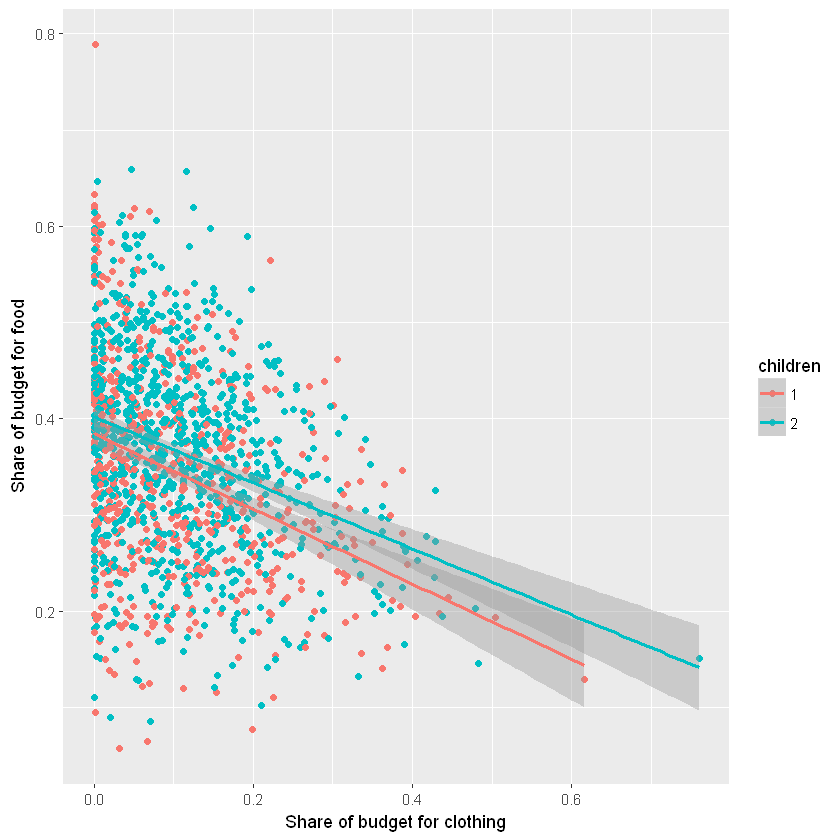

In [14]:
ggplot(budget1, aes(x = wcloth, y = wfood, col = children)) +
geom_point() + geom_smooth(method=lm) + 
labs (x = 'Share of budget for clothing', y = 'Share of budget for food')

We should make a second graph. You should make a bar chart with age on the x-axis and wfood on the y-axis. Give different colors for the number of children. The graph should be "stacked" (bars on top of each other). You can extra points if you can change the colors to red and blue.

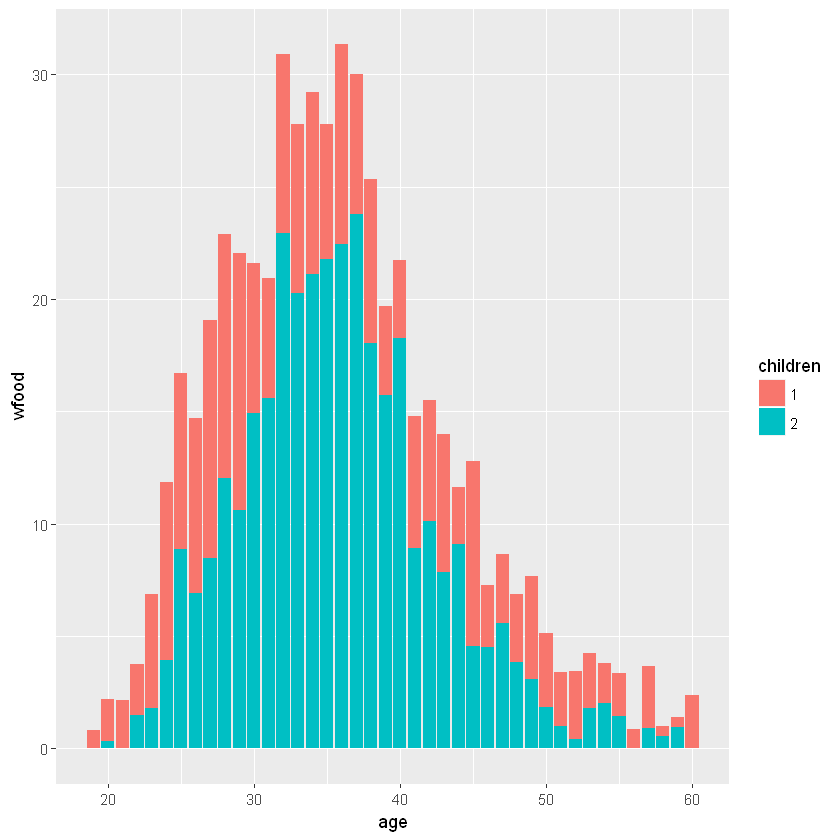

In [34]:
ggplot(budget1, aes(x = age, y = wfood, fill = children)) +
    geom_bar(stat="identity")

I tried changing the colours to red and blue by usig the following code:

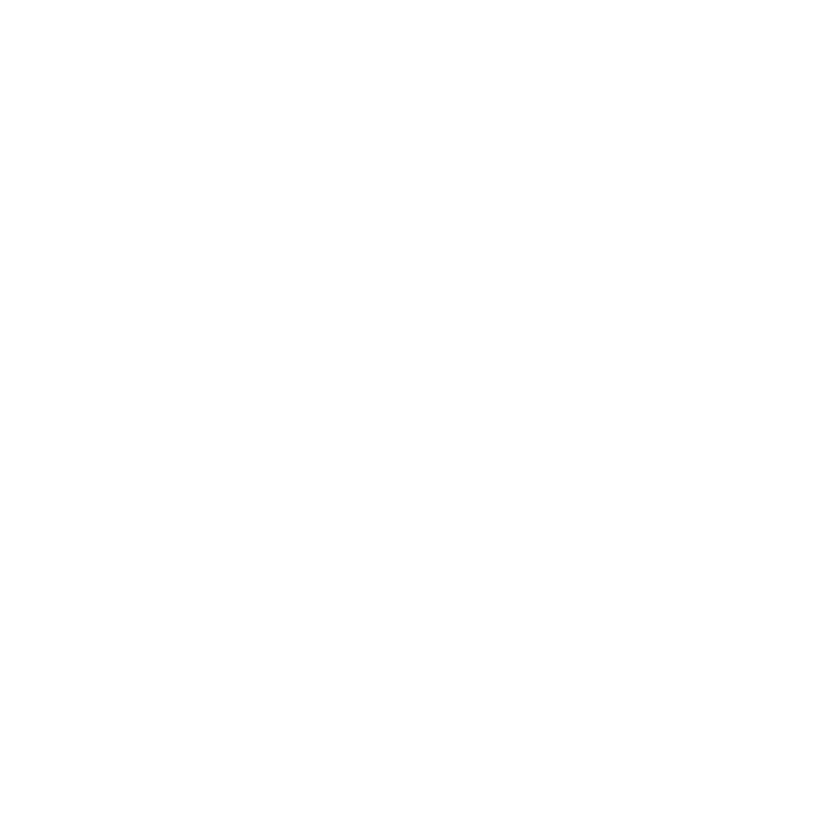

In [35]:
ggplot(budget1, aes(x = age, y = wfood, fill = children)) +
    geom_bar(stat="identity", fill = c('red', 'blue'))

## Extra points:

You can earn extra points you are able to produce a dataframe with the observations of which the totalbudget is not nearly 1. As you might have observed, there are a few NA's is the dataset. 
First set the NA's in the dataset to 0.
Then, You should round the numbers first with zero decimals and then convert them into integers.

Finally make a dataframe "warning" with observations that have a totalbudget that is not equal to 1 and show the dataframe with the command warning.